In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "SPD"
coin_per_block = 15
our_nethash = 540

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [3]:
df = pd.read_csv(fname)

In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [6]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 150951


In [7]:
COIN_NETHASH_INFO_PATH = "coin_nethash_info"
fname = os.path.join(COIN_NETHASH_INFO_PATH, coin+"_nethash_info.csv")

In [8]:
df_nethash = pd.read_csv(fname)

In [9]:
df = pd.merge(df, df_nethash, how='inner', on='height')

In [10]:
df.head(5)

,difficulty,flags,height,nonce,time,date,nethash
0,6950.556478,proof-of-work stake-modifier,150588,3.918015e+09,1.525654e+09,2018-05-07 00:41:26,335420
1,78822.892380,proof-of-stake,150587,0.000000e+00,1.525654e+09,2018-05-07 00:40:32,237649
2,57219.581135,proof-of-stake,150586,0.000000e+00,1.525654e+09,2018-05-07 00:39:44,237649
3,41536.767505,proof-of-stake,150585,0.000000e+00,1.525654e+09,2018-05-07 00:39:28,237649
4,30152.568889,proof-of-stake,150584,0.000000e+00,1.525654e+09,2018-05-07 00:39:12,237649


In [11]:
df_type = df.groupby("flags").size().reset_index(name='counts')
df_type["percentage"]=df_type["counts"]/sum(df_type["counts"])
df_type

,flags,counts,percentage
0,proof-of-stake,542,0.469671
1,proof-of-stake stake-modifier,207,0.179376
2,proof-of-work,305,0.264298
3,proof-of-work stake-modifier,100,0.086655


In [12]:
df_pow_block_rate = df[['flags','height','time', 'nethash']][df['flags'].str.contains("proof-of-work")].reset_index()
df_pow_block_rate.head(10)

,index,flags,height,time,nethash
0,0,proof-of-work stake-modifier,150588,1.525654e+09,335420
1,5,proof-of-work,150580,1.525653e+09,198246
2,6,proof-of-work,150579,1.525653e+09,137192
3,8,proof-of-work stake-modifier,150575,1.525653e+09,148013
4,10,proof-of-work stake-modifier,150573,1.525653e+09,340645
5,16,proof-of-work,150564,1.525653e+09,314002
6,17,proof-of-work,150563,1.525653e+09,208938
7,27,proof-of-work,150544,1.525652e+09,226085
8,29,proof-of-work,150541,1.525652e+09,147936
9,32,proof-of-work stake-modifier,150535,1.525652e+09,191896


In [13]:
height_MA_window = min(400, int((df_pow_block_rate.count()[0]-1)*0.5))
print("Block Height MA Windows = {}".format(height_MA_window))

nethash_MA_window = 50
print("Nethash MA Windows = {}".format(nethash_MA_window))

Block Height MA Windows = 202
Nethash MA Windows = 50


In [14]:
df_pow_count = df_pow_block_rate.count()[0]
print("Num of POW = {}".format(df_pow_count))

Num of POW = 405


In [15]:
df_pow_block_rate['pow_index'] = pd.DataFrame(range(df_pow_count)[::-1])
df_pow_block_rate.tail(5)

,index,flags,height,time,nethash,pow_index
400,1142,proof-of-work,148965,1.525590e+09,245632,4
401,1146,proof-of-work,148959,1.525590e+09,147450,3
402,1147,proof-of-work,148958,1.525590e+09,127225,2
403,1150,proof-of-work,148955,1.525590e+09,128623,1
404,1153,proof-of-work,148952,1.525590e+09,198652,0


In [16]:
df_pow_block_rate_window = df_pow_block_rate[["time", "pow_index"]].diff(-height_MA_window)
df_pow_block_rate_window_row_count = int(df_pow_block_rate_window.count()[0])
df_pow_block_rate_window['block_per_day']=df_pow_block_rate_window['pow_index']/df_pow_block_rate_window['time']*3600*24
print("Number of Rows in POW Height MA = {}".format(df_pow_block_rate_window_row_count))
df_pow_block_rate_window.head(8)

Number of Rows in POW Height MA = 203


,time,pow_index,block_per_day
0,34821.0,202.0,501.214784
1,34810.0,202.0,501.373169
2,34848.0,202.0,500.826446
3,34745.0,202.0,502.311124
4,34693.0,202.0,503.064019
5,34194.0,202.0,510.405334
6,34277.0,202.0,509.169414
7,33671.0,202.0,518.333284


In [17]:
df_nethash_MA = df_pow_block_rate[["nethash"]].rolling(window=5).mean()
df_nethash_MA_row_count = int(df_nethash_MA.count()[0])
print("Number of Rows in Nethash MA = {}".format(df_nethash_MA_row_count))
df_nethash_MA.head(8)

Number of Rows in Nethash MA = 401


,nethash
0,NaN
1,NaN
2,NaN
3,NaN
4,231903.2
5,227619.6
6,229758.0
7,247536.6


In [18]:
df_pow_block_rate_full = pd.concat([df_pow_block_rate_window, df_nethash_MA, df["height"]],axis=1)
df_pow_block_rate_full_row_count = df_pow_block_rate_full.count()[0]
print(df_pow_block_rate_full_row_count)
df_pow_block_rate_full = df_pow_block_rate_full.dropna()
df_pow_block_rate_full.head(5)

203


,time,pow_index,block_per_day,nethash,height
4,34693.0,202.0,503.064019,231903.2,150584
5,34194.0,202.0,510.405334,227619.6,150580
6,34277.0,202.0,509.169414,229758.0,150579
7,33671.0,202.0,518.333284,247536.6,150577
8,33666.0,202.0,518.410266,247521.2,150575


In [19]:
df_pow_nethash_block_profit = df_pow_block_rate_full
df_pow_nethash_block_profit["profit"] = df_pow_block_rate_full["block_per_day"]*our_nethash/df_pow_block_rate_full["nethash"]*coin_per_block
df_pow_nethash_block_profit.head(5)

,time,pow_index,block_per_day,nethash,height,profit
4,34693.0,202.0,503.064019,231903.2,150584,17.571204
5,34194.0,202.0,510.405334,227619.6,150580,18.163125
6,34277.0,202.0,509.169414,229758.0,150579,17.950506
7,33671.0,202.0,518.333284,247536.6,150577,16.961127
8,33666.0,202.0,518.410266,247521.2,150575,16.964701


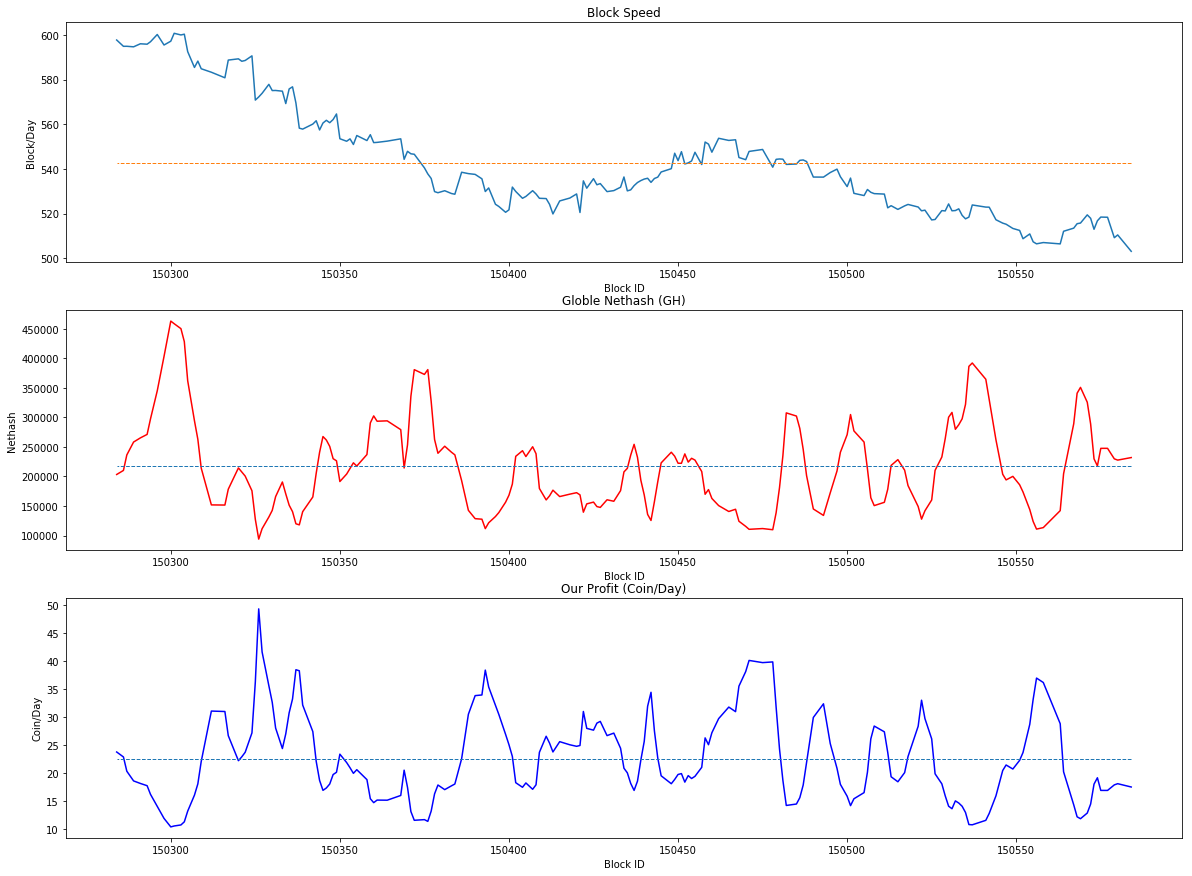

In [20]:
fig = plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['block_per_day'])
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['block_per_day'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)

plt.title('Block Speed')
plt.xlabel('Block ID')
plt.ylabel('Block/Day')

plt.subplot(3, 1, 2)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['nethash'], color='red')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['nethash'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Globle Nethash (GH)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.subplot(3, 1, 3)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['profit'], color='blue')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['profit'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Our Profit (Coin/Day)')
plt.xlabel('Block ID')
plt.ylabel('Coin/Day')

plt.show()
